In [1]:
import os
import time
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.utils import normalize
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.fft import fft, fftfreq, ifft
import scipy
from scipy.fftpack import fft
from scipy.fftpack import dct
from scipy import fftpack
from scipy import signal
from scipy.signal import chirp
import csv
from sklearn.model_selection import cross_val_score
from scipy.signal import filtfilt
from scipy.signal import lfilter
from scipy import stats
from scipy.signal import butter, lfilter, lfilter_zi, normalize
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv1D, Conv2D, Dropout, Activation, MaxPool1D, MaxPool2D, Flatten
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
import h5py
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

In [2]:
Channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

In [3]:
total_channels = 14
total_Person = 23 # This must be 23 as we have 23 subjects. 
total_Stimuli = 18

from PIL import Image
import imageio

allStimuliData = []

for PersonCount in range(total_Person):
    for index in range(total_Stimuli):
        for channel in Channels:
            img = cv2.imread('Spectograms/P' + str(PersonCount + 1) + '_S' + str(index + 1) + '_' + channel + '.jpg')
            img = cv2.resize(img, (100, 120))
            img = img/255
            allStimuliData.append(img)

allStimuliData = np.array(allStimuliData)
allStimuliData.shape


(5796, 120, 100, 3)

In [4]:
#This will be used to Train CNN model.

#Class Distribution of Self assesment ratings for Arousal, Valence and Dominance
ratings = pd.read_csv('Dataset/Results/AllRatings.csv')
AllRatings = pd.DataFrame(ratings)

Arousal = []
Valence = []
Dominance = []

ArousalCountz = 0
ArousalCountone = 0

ValenceCountz = 0
ValenceCountone = 0

DominanceCountz = 0
DominanceCountone = 0

count = total_Person*total_Stimuli

values = AllRatings['Arousal']
for i in range(count):
    if values[i] < 2.5:
        for j in range(14): # As each 14 channel co-responds to 1 result for 1 stimuli, we are assigning same value for all the channel for each stimuli singals.
            Arousal.append([0]) # uninterested/bored
            ArousalCountz = ArousalCountz+1
    else:
        for j in range(14): # As each 14 channel co-responds to 1 result for 1 stimuli, we are assigning same value for all the channel for each stimuli singals.
            Arousal.append([1]) # excited/alert
            ArousalCountone = ArousalCountone+1
    
values = AllRatings['Valence']
for i in range(count):
    if values[i] < 2.5:
        for j in range(14): # As each 14 channel co-responds to 1 result for 1 stimuli, we are assigning same value for all the channel for each stimuli singals.
            Valence.append([0]) # unpleasant/stressed
            ValenceCountz = ValenceCountz+1
    else:
        for j in range(14): # As each 14 channel co-responds to 1 result for 1 stimuli, we are assigning same value for all the channel for each stimuli singals.
            Valence.append([1]) # happy/elated
            ValenceCountone = ValenceCountone+1

        
values = AllRatings['Dominance']
for i in range(count):
    if values[i] < 2.5:
        for j in range(14): # As each 14 channel co responds to 1 result, we are assigning same value for all the channel for each stimuli singals.
            Dominance.append([0]) # helpless/Without Control
            DominanceCountz = DominanceCountz+1
    else:
        for j in range(14): # As each 14 channel co responds to 1 result, we are assigning same value for all the channel for each stimuli singals.
            Dominance.append([1]) # Empowered
            DominanceCountone = DominanceCountone+1

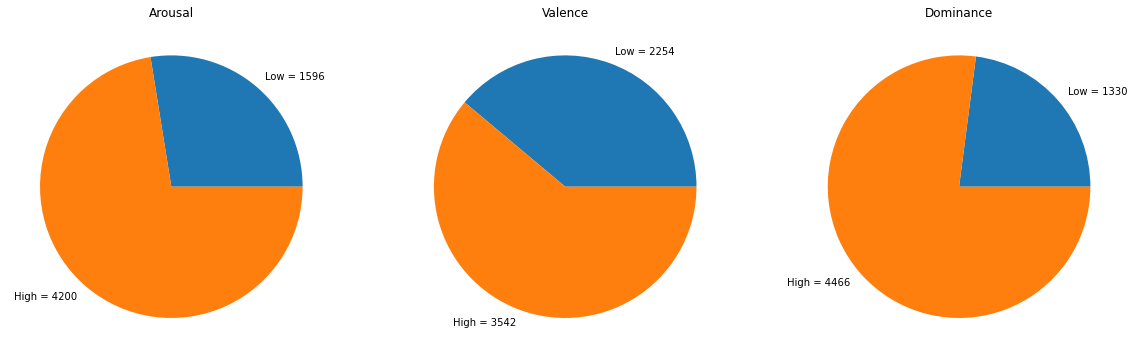

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

# Creating plot 
ax1.pie([ArousalCountz,ArousalCountone], labels = ['Low = '+str(ArousalCountz),'High = '+str(ArousalCountone)]) 
ax1.set_title('Arousal')

ax2.pie([ValenceCountz,ValenceCountone], labels = ['Low = '+str(ValenceCountz),'High = '+str(ValenceCountone)]) 
ax2.set_title('Valence')

ax3.pie([DominanceCountz,DominanceCountone], labels = ['Low = '+str(DominanceCountz),'High = '+str(DominanceCountone)]) 
ax3.set_title('Dominance')

plt.show() 

In [6]:
arousal = np.array(Arousal)
valance = np.array(Valence)
dominance = np.array(Dominance)
print(arousal.shape, valance.shape, dominance.shape)

(5796, 1) (5796, 1) (5796, 1)


In [7]:
#Valance

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(2,2),padding='same', activation='relu', input_shape=[120,100, 3]))

model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(units=630 , activation='relu', name='my_dense'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 100, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 100, 32)      4128      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 100, 64)      8256      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 50, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 192000)            0         
_________________________________________________________________
my_dense (Dense)             (None, 630)               1

In [8]:
from keras.models import Model
layer_name='my_dense'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

intermediate_layer_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 120, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 100, 32)      4128      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 100, 64)      8256      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 50, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 192000)            0     

In [9]:
from keras.optimizers import Adam, Adadelta, RMSprop

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# fit network

history = model.fit(allStimuliData, valance, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
182/182 [==============================] - 233s 1s/step - loss: 2.5427 - accuracy: 0.5777
Epoch 2/30
182/182 [==============================] - 231s 1s/step - loss: 0.6044 - accuracy: 0.6812
Epoch 3/30
182/182 [==============================] - 237s 1s/step - loss: 0.5131 - accuracy: 0.7462
Epoch 4/30
182/182 [==============================] - 232s 1s/step - loss: 0.4363 - accuracy: 0.8041
Epoch 5/30
182/182 [==============================] - 227s 1s/step - loss: 0.3761 - accuracy: 0.8227
Epoch 6/30
182/182 [==============================] - 226s 1s/step - loss: 0.3235 - accuracy: 0.8482
Epoch 7/30
182/182 [==============================] - 225s 1s/step - loss: 0.2553 - accuracy: 0.8788
Epoch 8/30
182/182 [==============================] - 227s 1s/step - loss: 0.2152 - accuracy: 0.9006
Epoch 9/30
182/182 [==============================] - 227s 1s/step - loss: 0.1882 - accuracy: 0.9118
Epoch 10/30
182/182 [==============================] - 221s 1s/step - loss: 0.1442 - accura

In [11]:
#Getting the trainned layer from the the previous CNN model.
feature_vector = intermediate_layer_model.predict(allStimuliData) 
feature_vector = pd.DataFrame(data=feature_vector)
print(feature_vector.shape)

(5796, 630)


In [12]:
# These are the features we have got from the dense layer (unit = 630)
feature_vector

,0,1,2,3,4,5,6,7,8,9,...,620,621,622,623,624,625,626,627,628,629
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.008173,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.771836,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.959048,0.0,0.0,0.0,0.0,0.0,0.0,8.224402,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.568236,0.0,0.0,0.0,0.0,0.0,0.0,12.450569,0.0,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.017851,0.0,0.0,0.0,0.0,0.0,0.0,15.023538,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.092429,0.0,0.0,0.0,0.0,0.0,0.0,2.340847,0.0,0.000000
5792,0.0,0.0,4.611399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.995553,0.0,0.0,0.0,0.0,0.0,0.0,2.490156,0.0,0.000000
5793,0.0,0.0,3.808208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.090225,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
5794,0.0,0.0,5.815944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.776673,0.0,0.0,0.0,0.0,0.0,0.0,0.662845,0.0,3.241740


In [13]:
# You can check the file named 'Feature_Vector_valance.csv'
feature_vector.to_csv('Feature_Vector_valance.csv')

In [15]:
import xgboost
from xgboost import XGBClassifier

xgbmodel = XGBClassifier(max_depth=3,
                      objective='binary:logistic',
                      n_estimators= 1000,
                      learning_rate = 0.05,
                      random_state=0)

# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(feature_vector, valance, test_size=0.3, random_state=0, stratify = valance)

xgbmodel.fit(X_train, y_train)
score = xgbmodel.score(X_test, y_test)*100
print('Accuracy -> %.3f' % (score) +'%')


[23:15:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy -> 99.770%


In [16]:
# evaluate model
print("valance : Results ->")
accuracy = xgbmodel.score(X_test, y_test)
acc = accuracy*100
print('Overall Accuracy -> %.3f' % (acc) +'%')


#ROC (Receiver operating characteristic) of Arousal
from sklearn.metrics import roc_curve
y_preds = xgbmodel.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)


# Getting the right threshold
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
threshold_value = float(ideal_roc_thresh['thresholds'])
print("Ideal threshold is: ", threshold_value) 


#Now use this threshold value in the confusion matrix to visualize the balance between tp, fp, fp, and fn
#Area under the curve (AUC) for ROC plot can be used to understand how well a classifier is performing. % chance that the model can distinguish between positive and negative classes.

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)*100
print('Area under curve, AUC = %.3f' % (auc_value) +'%')

print("Confusion Matrix")
valance_pred = (xgbmodel.predict(X_test)).astype("int32") # Setting a threshold.
cm = confusion_matrix(y_test, valance_pred)
print(cm)

valance : Results ->
Overall Accuracy -> 99.770%
Ideal threshold is:  1.0
Area under curve, AUC = 99.731%
Confusion Matrix
[[ 673    3]
 [   1 1062]]


In [17]:
Results_Summary = {
    'Expected' : y_test[:,0],
    'Predicted' : valance_pred
}
pd.DataFrame(Results_Summary)

,Expected,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
1734,0,0
1735,1,1
1736,0,0
1737,0,0


In [18]:
# You can check the file named 'valance_Predictions.csv'
Results_Summary = pd.DataFrame(Results_Summary)
Results_Summary.to_csv('valance_Predictions.csv')

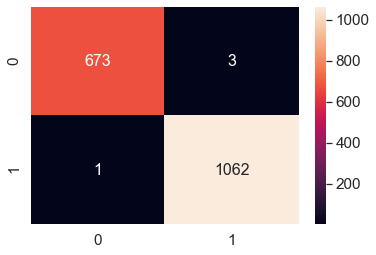

In [1]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[ 673,3],
        [1,1062]]

df_cm = pd.DataFrame(array, range(2), range(2)).round(5)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},  fmt='g') # font size

plt.show()